# 4.9 Intro to Data Visualization with Python

## Part 3

### (6.) Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import Data Sets
path = r'D:\02.2022_Instacart Basket Analysis'

In [4]:
df_cop_merged= pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','customer_orders_production_merge.pkl'))

In [5]:
df_cop_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30624955 entries, 0 to 30624954
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int32  
 1   first_name              object 
 2   last_name               object 
 3   gender                  object 
 4   state                   object 
 5   age                     int8   
 6   n_dependants            int8   
 7   family_status           object 
 8   income                  int32  
 9   order_id                int32  
 10  order_number            int8   
 11  orders_day_of_week      int8   
 12  order_time_of_day       int8   
 13  days_since_prior_order  float64
 14  first_order             bool   
 15  product_id              int32  
 16  add_to_cart_order       int16  
 17  reordered               int8   
 18  product_name            object 
 19  aisle_id                int8   
 20  department_id           int8   
 21  prices                  float

In [6]:
df_cop_merged.shape

(30624955, 31)

### (7.) If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

In [8]:
# (1) Bar chart

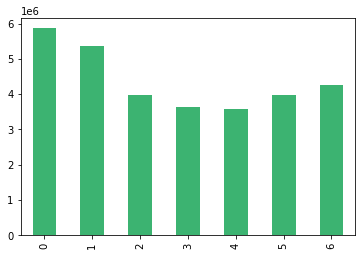

In [9]:
bar_ODW = df_cop_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['mediumseagreen'])

In [10]:
# (2) Histogram

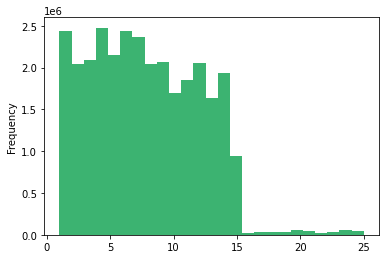

In [11]:
hist_price = df_cop_merged['prices'].plot.hist(bins = 25,color = "mediumseagreen")

In [12]:
# (3) Scatterplot

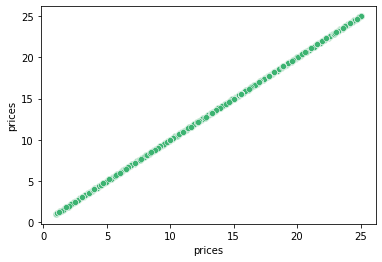

In [13]:
scatter_price = sns.scatterplot(x='prices', y='prices', data = df_cop_merged, color = "mediumseagreen")

In [14]:
# (4) Line chart -- a sample subset

In [15]:
# Makes the random numbers predictable
np.random.seed(4)

In [16]:
# Categorize the random number in differnet subset based on the length 
dev = np.random.rand(len(df_cop_merged)) <= 0.7

In [17]:
# Create a large subset
big = df_cop_merged[dev]

In [18]:
# Create a small subset
small = df_cop_merged[~dev]

In [19]:
df_cop_merged_s = small[['orders_day_of_week','prices']]

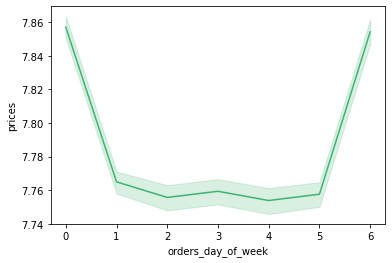

In [20]:
# Line chart based on small subset to save memory
Line_s_ODW_P = sns.lineplot(data = df_cop_merged_s, x='orders_day_of_week', y='prices',color = "mediumseagreen")

In [21]:
df_cop_merged_b = big[['orders_day_of_week','prices']]

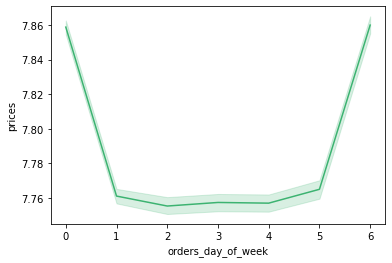

In [22]:
# Line chart based on large subset to check the representativity of large subset 
Line_b_ODW_P = sns.lineplot(data = df_cop_merged_b, x='orders_day_of_week', y='prices',color = "mediumseagreen") 

The line chart of small sample is similar to the one of large sample. This means that the line chart of small sample is represnetative enough. 

### (8.) You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.In a markdown cell beneath your histogram, describe what the histogram demonstrates.

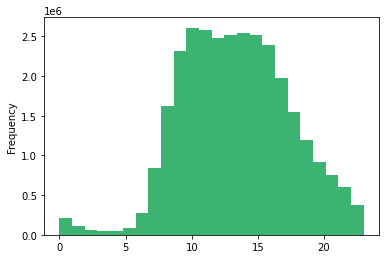

In [24]:
hist_OTD = df_cop_merged['order_time_of_day'].plot.hist(bins = 24,color = "mediumseagreen")

The majority of order is placed in the middle of the day.

### (9.) The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

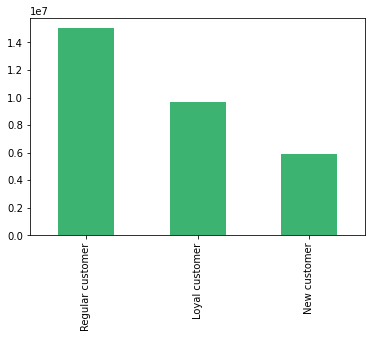

In [26]:
bar_loyalty = df_cop_merged['loyalty_flag'].value_counts().plot.bar(color = ['mediumseagreen'])

### (10.) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [28]:
# Creat a small subset
df_cop_merged_s_2 = small[['order_time_of_day','prices']]

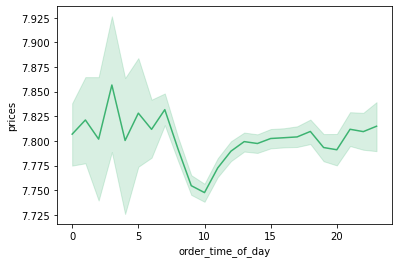

In [29]:
# Line chart based on small subset
Line_price_HoD = sns.lineplot(data = df_cop_merged_s_2, x='order_time_of_day', y='prices',color = "mediumseagreen")

In [30]:
# Create a large subset
df_cop_merged_b_2 = big[['order_time_of_day','prices']]

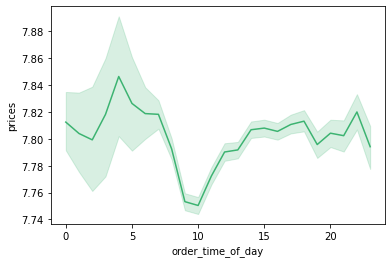

In [31]:
# line chart based on large subset
Line_price_HoD_b = sns.lineplot(data = df_cop_merged_b_2, x='order_time_of_day', y='prices',color = "mediumseagreen") 

There is large deviation in small and big sample before 10 am. It is a little bit difficult to tell whether the price berfore 10 am is larger than the other periods. Therefore, I prefer to have a line chart based on whole dataset. 

In [32]:
df_cop_merged_all = df_cop_merged[['order_time_of_day','prices']]

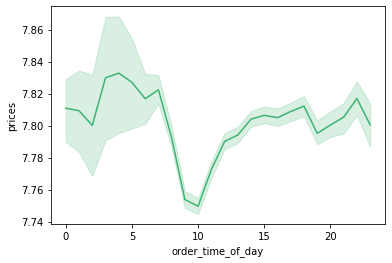

In [33]:
# Line chart basedon whole data sets
Line_price_HoD_all = sns.lineplot(data = df_cop_merged_all, x='order_time_of_day', y='prices',color = "mediumseagreen") 

The prices are placed the highest around 3-7 am and lowest around 9 - 10 am. 

### (11.) Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:In a markdown cell beneath your line chart, describe what the line chart shows.

In [35]:
df_cop_merged_s_3 = small[['age','n_dependants']]

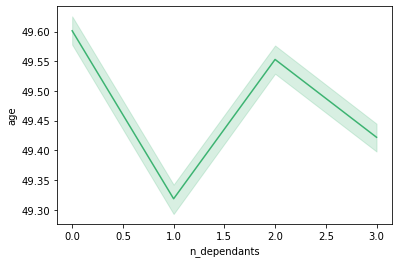

In [36]:
# Line chart based on small subset to save memory
Line_age_dependent = sns.lineplot(data = df_cop_merged_s_3, x='n_dependants', y='age',color = "mediumseagreen") 

In [37]:
df_cop_merged_s_3['age'].min()

18

In [38]:
df_cop_merged_s_3['age'].max()

81

In [39]:
df_cop_merged_s_3['age'].mean()

49.47389420918138

This graph shows the the numbr of dependents for cutomers at the average age. 

### (12.) You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [41]:
df_cop_merged_s_4 = small[['age','income']]

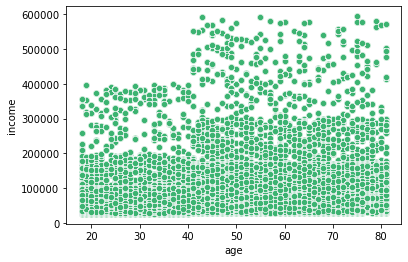

In [42]:
# Scatterplot based on small subset to save memory
scatter_age_spending = sns.scatterplot(x='age', y='income', data = df_cop_merged_s_4, color = "mediumseagreen")

People over 40 years have realtively higher spending power than younger people.  

### (13.) Export your visualizations as “.png” files in your relevant project folder.

In [44]:
bar_ODW.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_day_of_week_bar.png'))

In [45]:
hist_price.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','items_price_hist.png'))

In [46]:
scatter_price.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','check_price_coverage_scatter.png'))

In [47]:
Line_s_ODW_P.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_orders_day_of_week_s_line.png'))

In [48]:
Line_b_ODW_P.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_orders_day_of_week_b_line.png'))

In [49]:
hist_OTD.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_time_of_day_hist.png'))

In [51]:
bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_bar.png'))

In [52]:
Line_price_HoD.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_over_hours_s_line.png'))

In [53]:
Line_price_HoD_b.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_over_hours_b_line.png'))

In [54]:
Line_price_HoD_all.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_over_hours_all_line.png'))

In [55]:
Line_age_dependent.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_dependents_s_line.png'))

In [56]:
scatter_age_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_spending_s_scatter.png'))